In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import scipy.cluster.hierarchy as sch

In [2]:
data_df = pd.read_csv("SMAI-Dataset-hc-dataset/new_customers.csv")

In [3]:
label_encoder = LabelEncoder()

data_df['Gender'] = label_encoder.fit_transform(data_df['Genre'])

In [4]:
data_df = data_df.drop("CustomerID", axis=1)
data_df = data_df.drop("Genre", axis=1)

In [5]:
data_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## 3.1

In [29]:
class HierarchicalClustering:
    def __init__(self, data):
        self.data = data
        self.linkage_matrix = None
        
    def linkages(self, linkage_type="single"):
        self.linkage_type = linkage_type
        self.linkage_matrix = sch.linkage(self.data, method=self.linkage_type)
        return self.linkage_matrix
    
    def dendrogram(self):
        if self.linkage_matrix is None:
            raise ValueError("Linkage matrix has not been calculated.")
    
        plt.figure(figsize=(15, 10))
        dendrogram = sch.dendrogram(self.linkage_matrix)
    
        plt.title(f"Dendrogram ({self.linkage_type} linkage)")
        plt.xlabel("Data Points")
        plt.ylabel("Distance")
        plt.show()

### Single Linkage

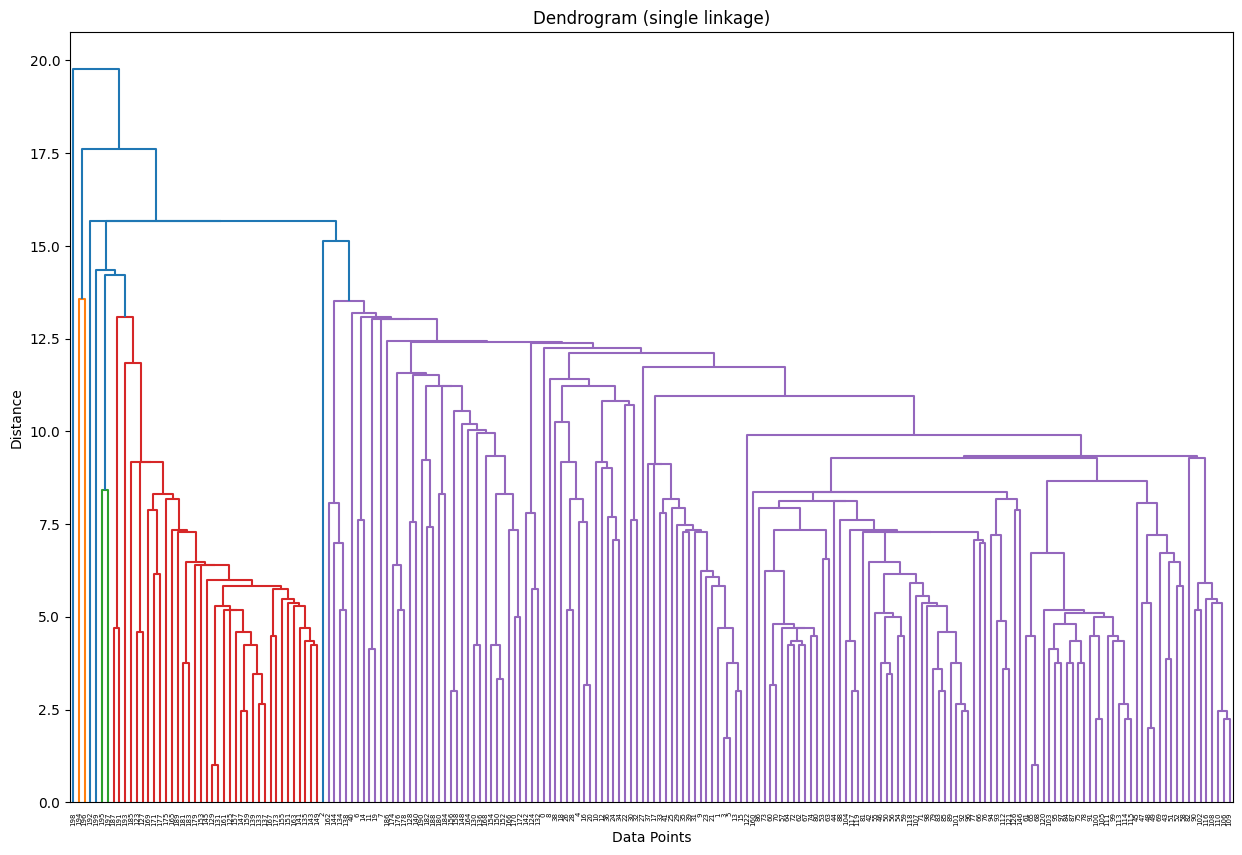

In [30]:
hc = HierarchicalClustering(data=data_df)
linkage_matrix = hc.linkages(linkage_type='single')
hc.dendrogram()

### Complete Linkage

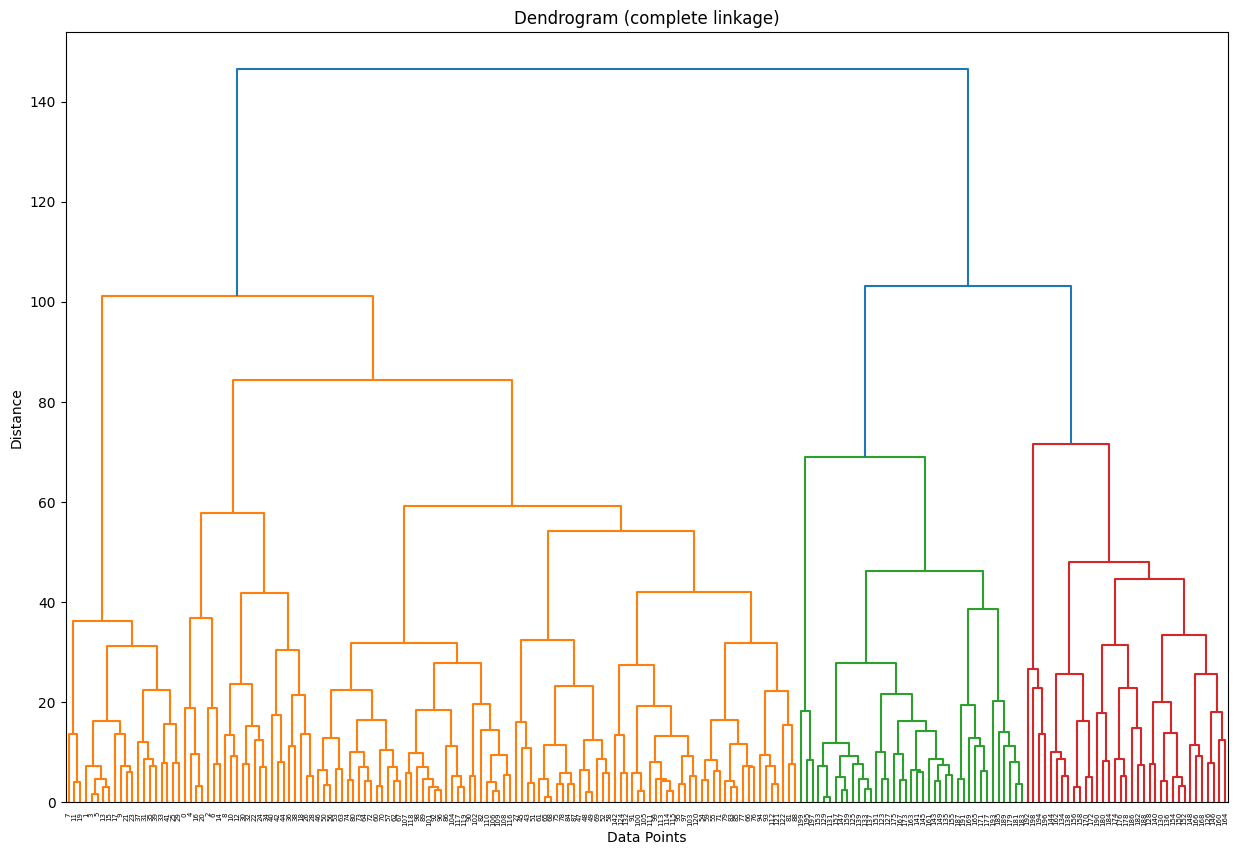

In [31]:
hc = HierarchicalClustering(data=data_df)
linkage_matrix = hc.linkages(linkage_type='complete')
hc.dendrogram()

### Average Linkage

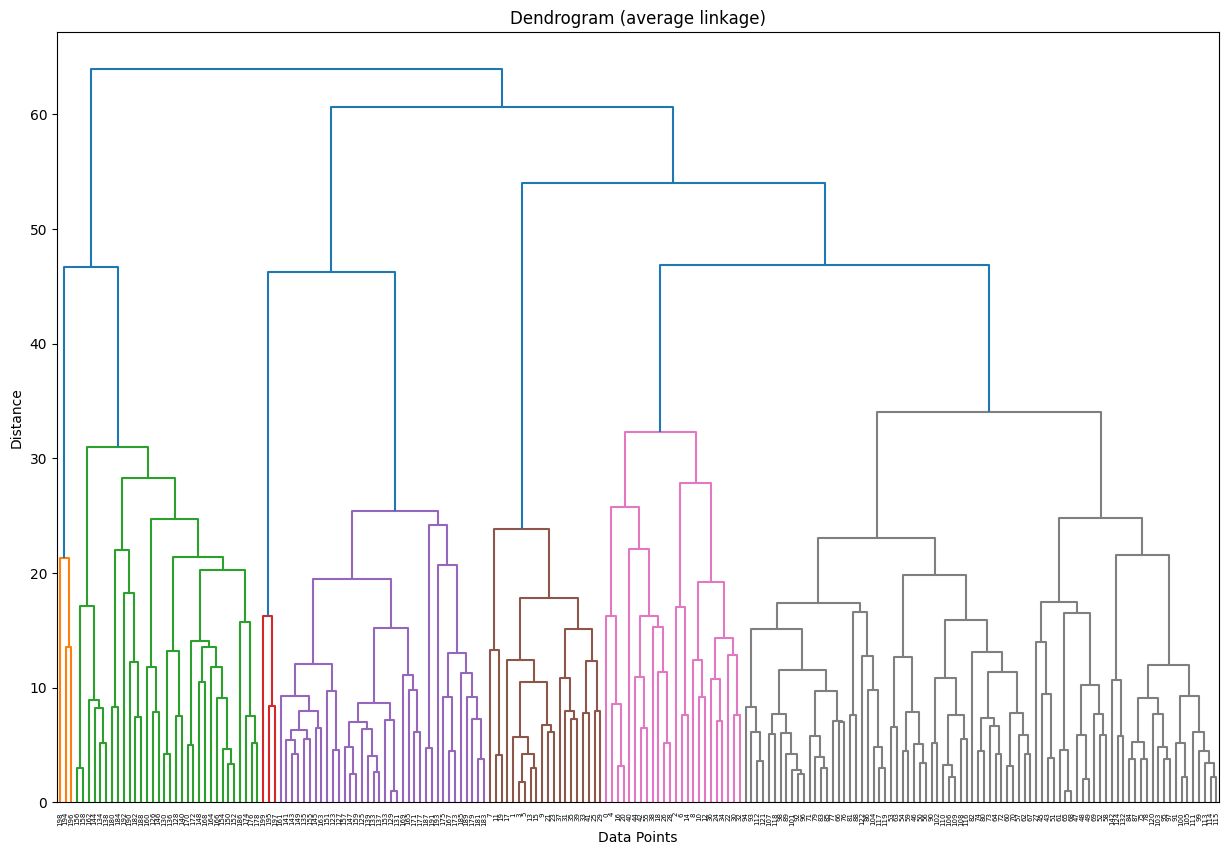

In [32]:
hc = HierarchicalClustering(data=data_df)
linkage_matrix = hc.linkages(linkage_type='average')
hc.dendrogram()

Single linkage tends to create long and elongated clusters, often being sensitive to outliers and noise in the data. Complete linkage, on the other hand, forms compact and well-separated clusters, making it robust against outliers but potentially merging closely located clusters. Average linkage strikes a balance, creating clusters with moderate compactness and sensitivity to outliers. 

### Using Age and Annual Income features only

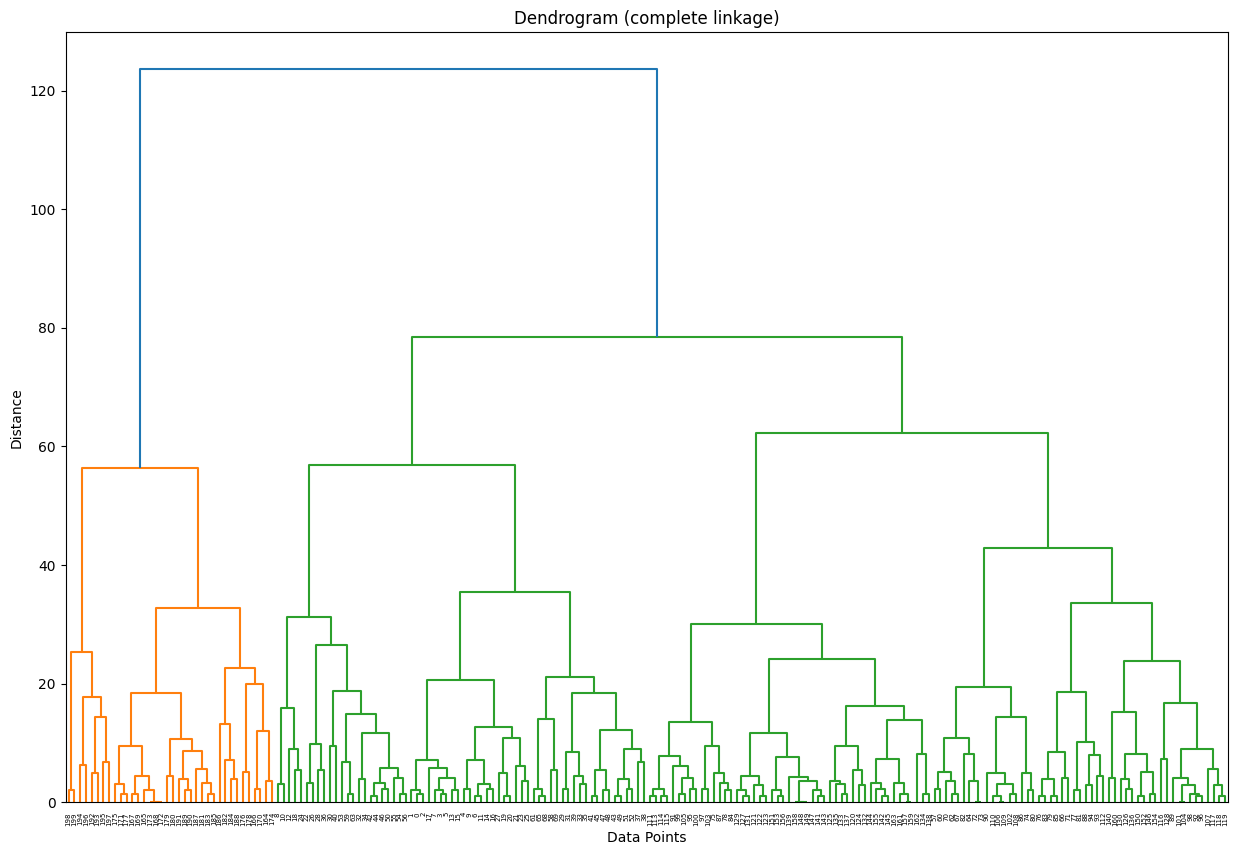

In [33]:
subset_data = data_df[['Age', 'Annual Income (k$)']]

hc = HierarchicalClustering(data=subset_data)
linkage_matrix = hc.linkages(linkage_type='complete')
hc.dendrogram()

After using a subset of data i.e. Age and Annual Income of customers, we can observe that fewer clusters are formed using the complete linkage type. This indicated a strong hierarchical relationship among the selected features.

### Using Annual Income and Spending Score features only

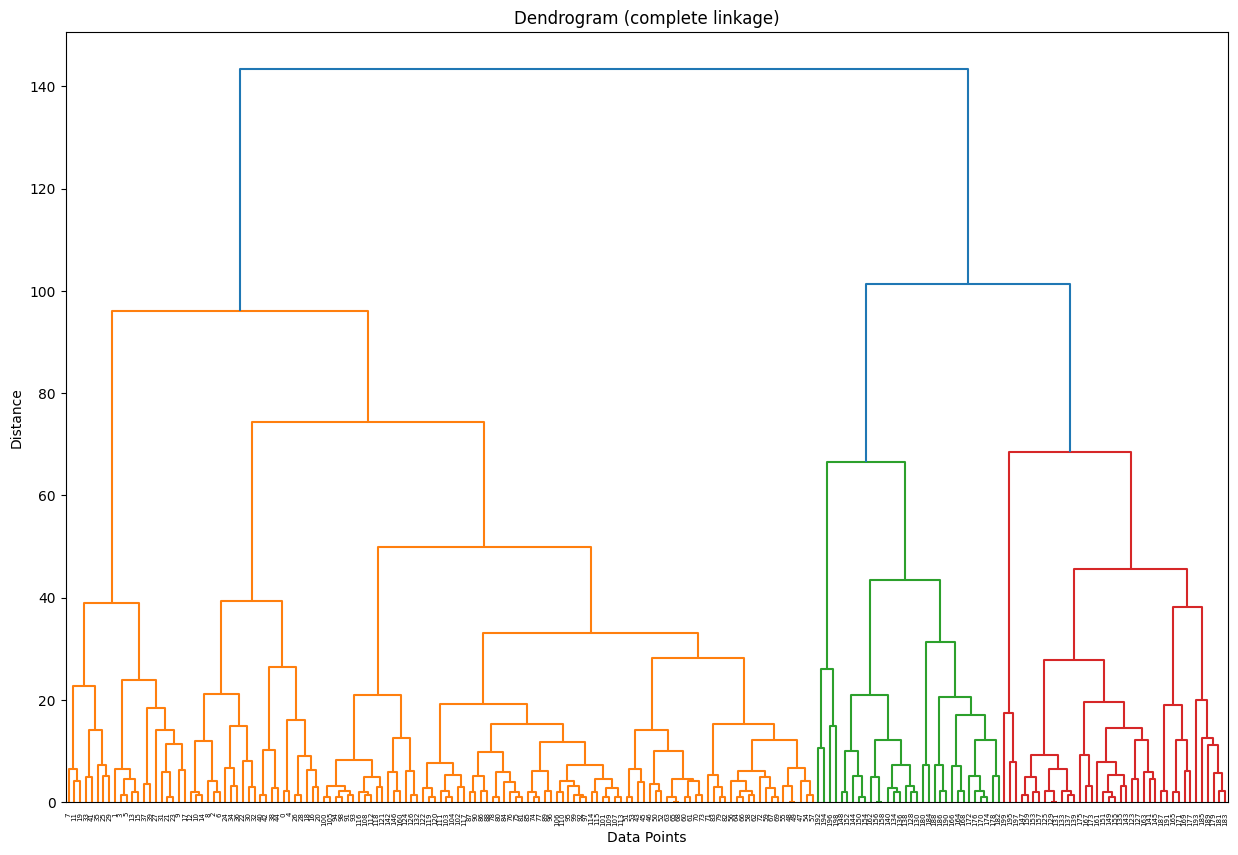

In [34]:
subset_data = data_df[['Annual Income (k$)', 'Spending Score (1-100)']]

hc = HierarchicalClustering(data=subset_data)
linkage_matrix = hc.linkages(linkage_type='complete')
hc.dendrogram()

### Using Annual Income, Spending Score and Gender features only

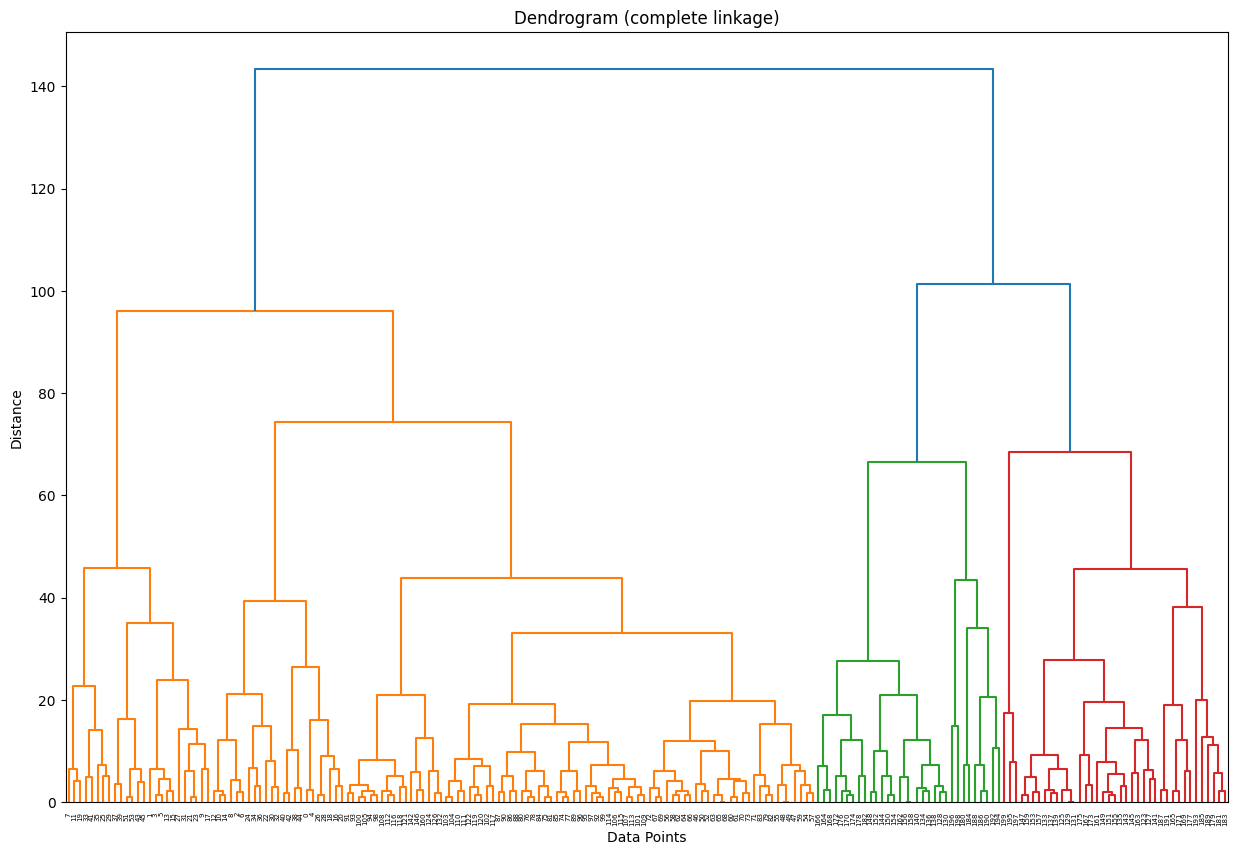

In [35]:
subset_data = data_df[['Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

hc = HierarchicalClustering(data=subset_data)
linkage_matrix = hc.linkages(linkage_type='complete')
hc.dendrogram()

## 3.2

In [26]:
gene_df = pd.read_csv("SMAI-Dataset-gene-expression/gene.csv")

In [27]:
gene_df = gene_df.drop("ID_REF", axis=1)

In [39]:
gene_df.head()

,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


### Single Linkage

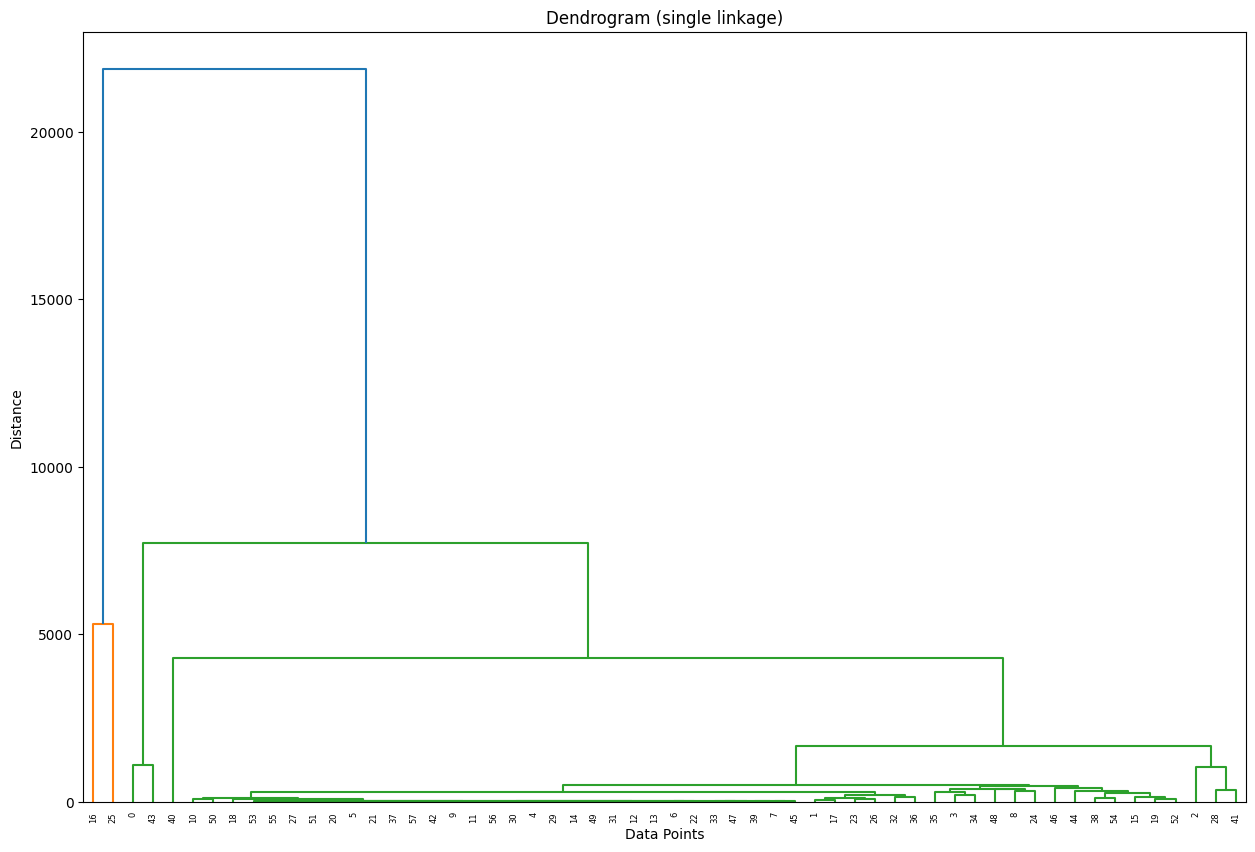

In [36]:
hc = HierarchicalClustering(data=gene_df)
linkage_matrix = hc.linkages(linkage_type='single')
hc.dendrogram()

### Complete Linkage

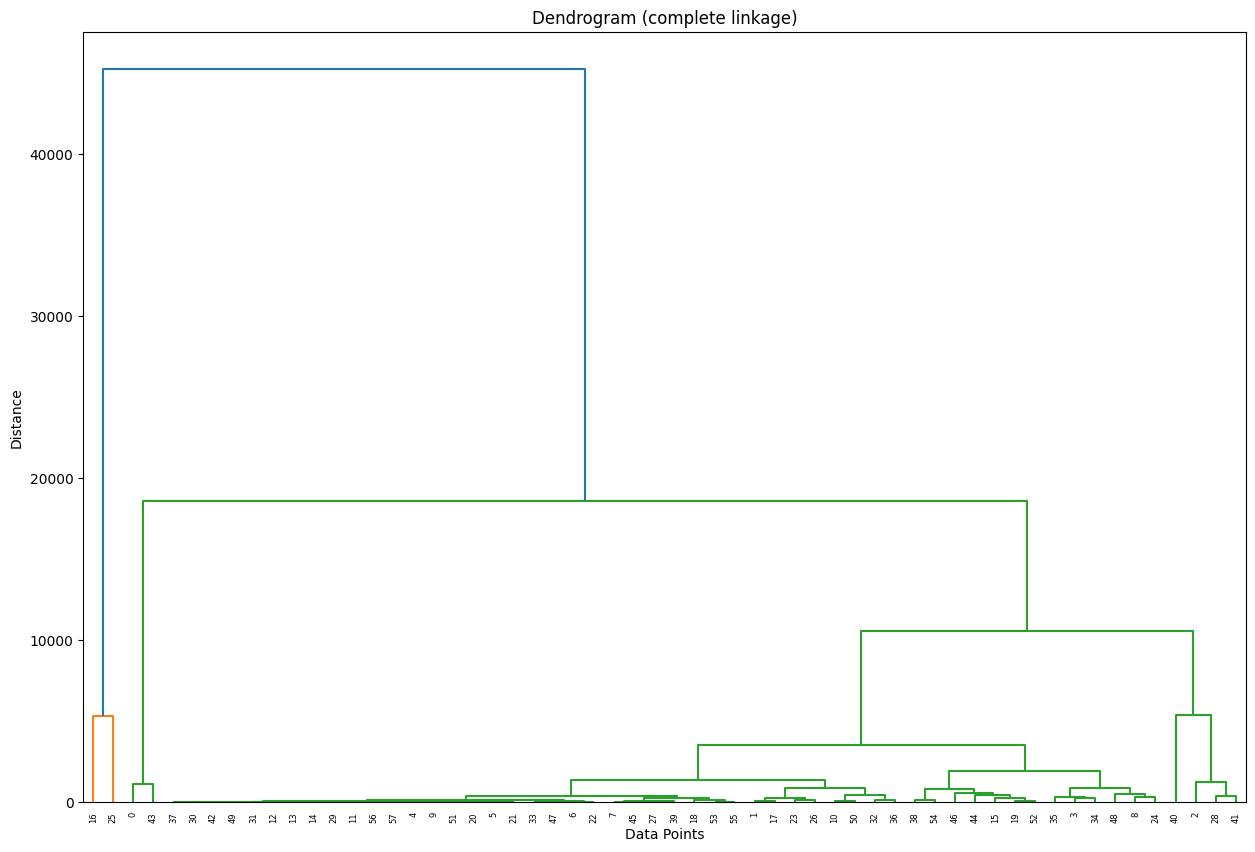

In [37]:
hc = HierarchicalClustering(data=gene_df)
linkage_matrix = hc.linkages(linkage_type='complete')
hc.dendrogram()

### Average Linkage

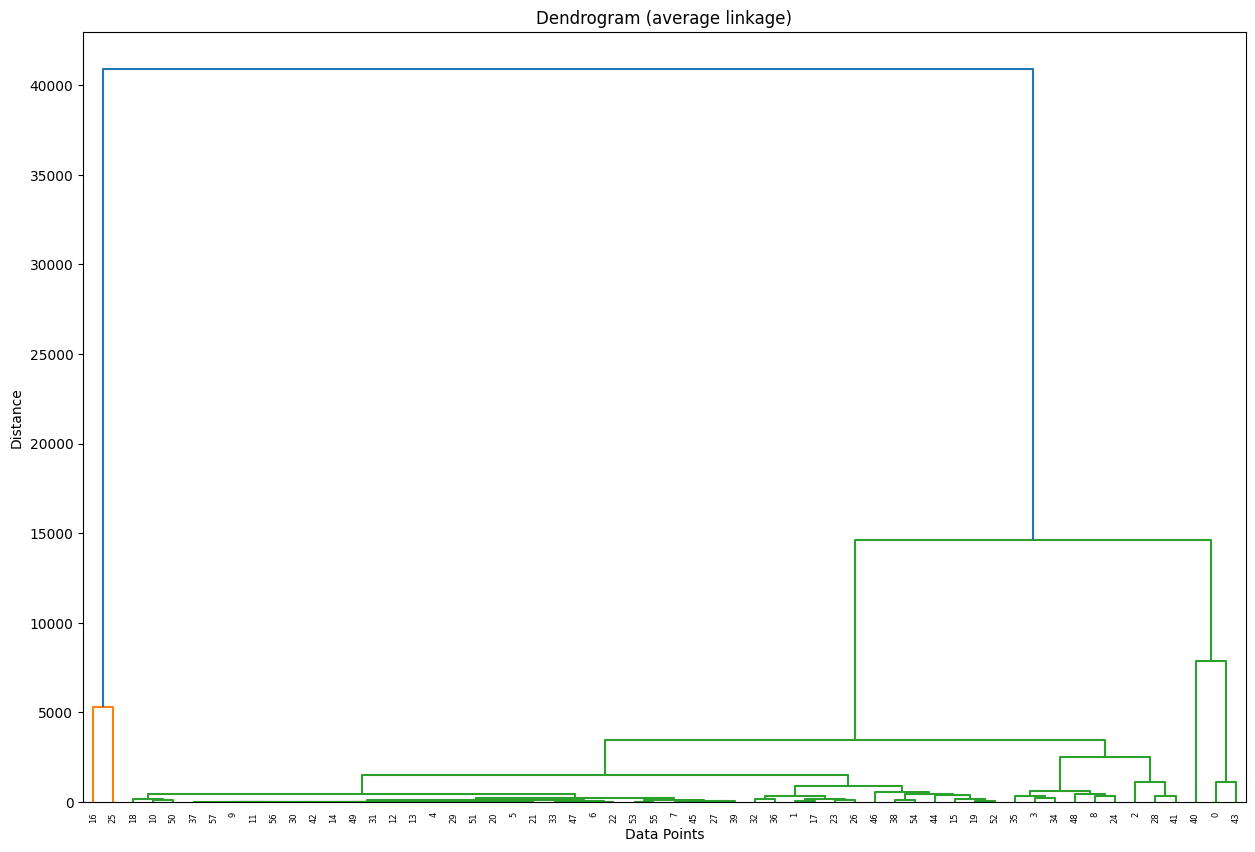

In [38]:
hc = HierarchicalClustering(data=gene_df)
linkage_matrix = hc.linkages(linkage_type='average')
hc.dendrogram()

The distance between the clusters tends is relatively high. This suggests that there is a substantial dissimilarity or variability in the gene expression patterns among the genes included in the dataset. High inter-cluster distances indicate that the selected genes exhibit diverse expression profiles, potentially reflecting various biological functions or regulatory mechanisms. Researchers can further investigate these dissimilarities to gain insights into the underlying biology, such as identifying gene groups with distinct roles or responses in specific cellular processes.

### Using a subset of features

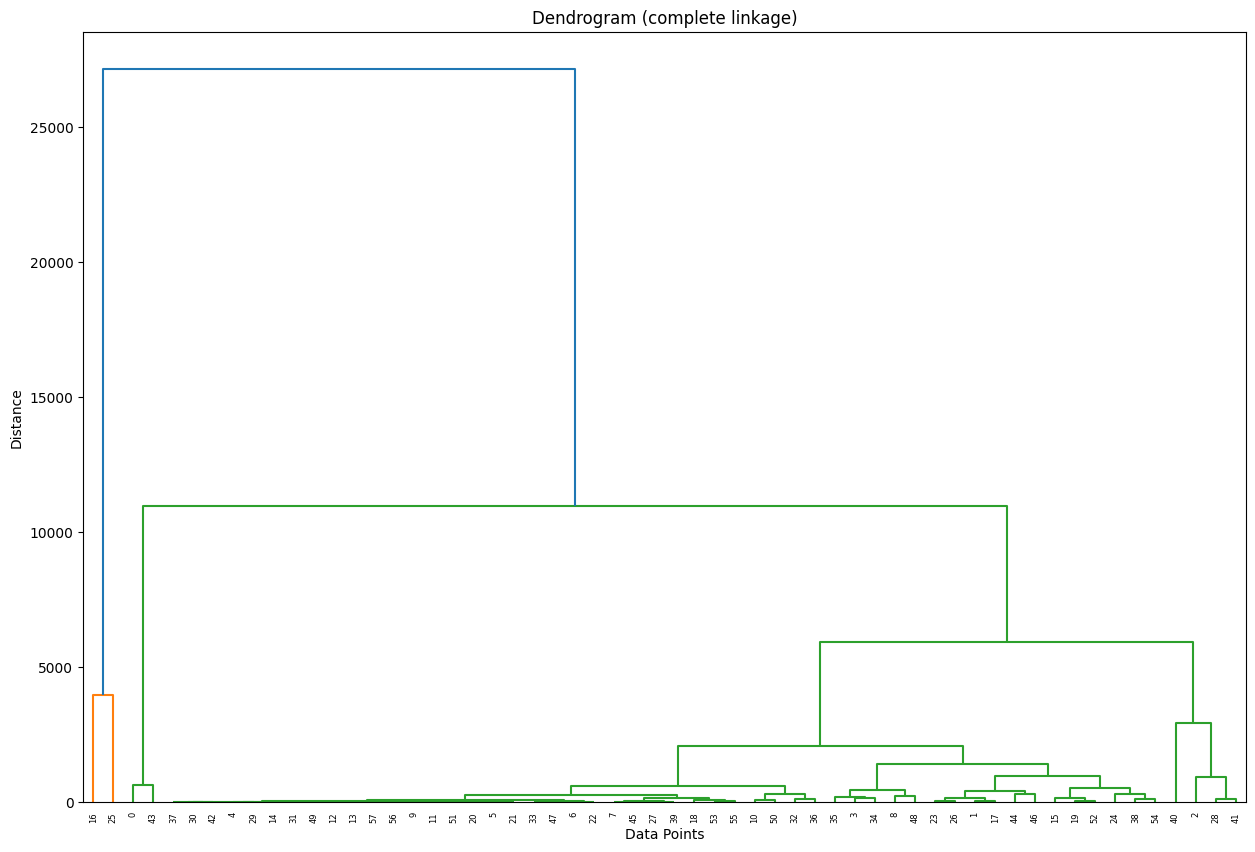

In [45]:
subset_data = gene_df[['GSM613412', 'GSM613418', 'GSM613419', 'GSM613422', 'GSM613423']]

hc = HierarchicalClustering(data=subset_data)
linkage_matrix = hc.linkages(linkage_type='complete')
hc.dendrogram()

The clustering patterns observed when using a subset of the dataset are strikingly similar to those obtained when the entire dataset is employed. This consistency in clustering suggests that the selected subset of genes or features captures the essential patterns and relationships present in the full gene expression dataset. It implies that the genes included in the subset are highly representative of the broader gene expression profiles, reinforcing the robustness of the identified clusters and their biological significance. This similarity between subsets and the full dataset enhances the efficiency of clustering analysis while reducing computational complexity, making it easier to work with a reduced feature set while preserving meaningful insights from the data.